In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

In [2]:
data = pd.read_csv("airline-passengers.csv", index_col="Month", parse_dates=True)
data.columns = ["Passengers"]

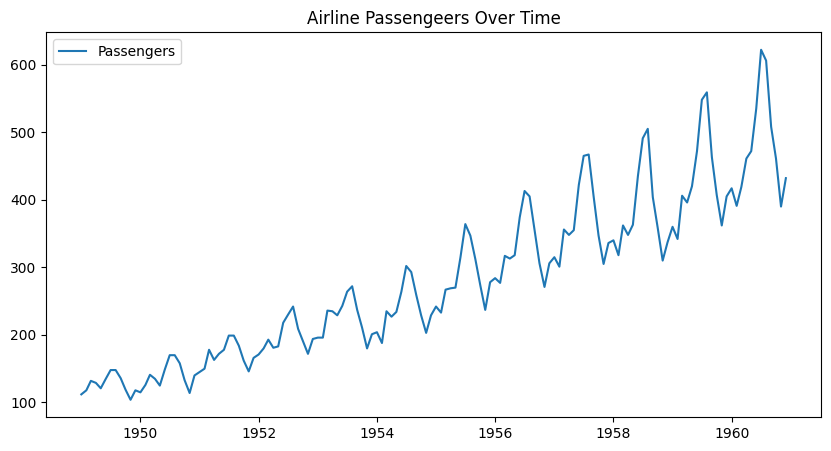

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(data, label="Passengers")
plt.title("Airline Passengeers Over Time")
plt.legend()
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Series is stationary")
    else:
        print("Series is not stationary")

adf_test(data["Passengers"])

ADF Statistic 0.8153688792060472
p-value: 0.991880243437641
Series is not stationary


In [5]:
data["Passengers_diff"] = data["Passengers"].diff().dropna()
adf_test(data["Passengers_diff"].dropna())

ADF Statistic -2.8292668241699905
p-value: 0.05421329028382671
Series is not stationary


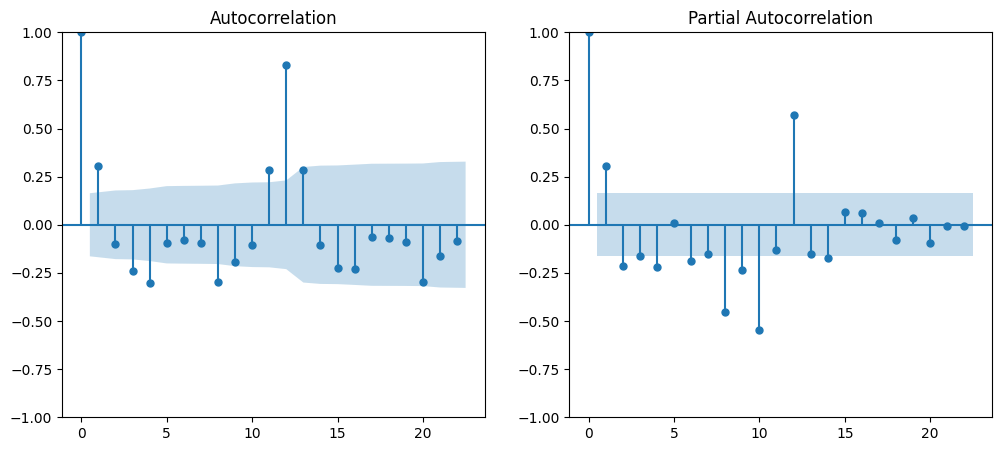

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(data["Passengers_diff"].dropna(), ax = ax[0])
plot_pacf(data["Passengers_diff"].dropna(), ax = ax[1])
plt.show()

In [12]:
model = ARIMA(data["Passengers"], order=(2, 1, 2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 05 Mar 2025   AIC                           1353.347
Time:                        09:03:26   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.849      0.0

In [14]:
forecast = model_fit.forecast(steps=12)
print("Forecasted values")
print(forecast)

Forecasted values
1961-01-01    439.854494
1961-02-01    465.296029
1961-03-01    500.665753
1961-04-01    535.971690
1961-05-01    561.690192
1961-06-01    571.314540
1961-07-01    562.974430
1961-08-01    539.731313
1961-09-01    508.529669
1961-10-01    478.147882
1961-11-01    456.746794
1961-12-01    449.695558
Freq: MS, Name: predicted_mean, dtype: float64


<ipython-input-15-5e48b61dc955>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start = data.index[-1], periods=13, freq="M")[1:], forecast, label="Forecast", color="red")


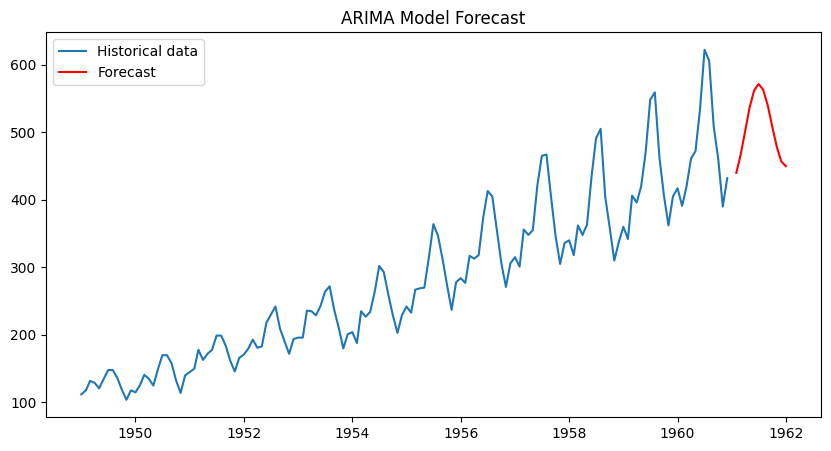

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(data['Passengers'], label="Historical data")
plt.plot(pd.date_range(start = data.index[-1], periods=13, freq="M")[1:], forecast, label="Forecast", color="red")
plt.title("ARIMA Model Forecast")
plt.legend()
plt.show()